In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print(os.listdir("C:\\Users\\sam\\Desktop\\Project2021\\Malariadetection"))

['.ipynb_checkpoints', 'Cellimages', 'Gans', 'MDCNNSigmoid.ipynb', 'MDCNNSoftmax.ipynb', 'MobileNet(softmax).ipynb', 'Untitled.ipynb', 'vgg19 - finetuned .ipynb', 'vgg19 - tuned.ipynb']


In [ ]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sam\Anaconda3\env

In [ ]:
parasitized_data = os.listdir('C:/Users/sam/Desktop/Project2021/Malariadetection/Cellimages/cell_images/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('C:/Users/sam/Desktop/Project2021/Malariadetection/Cellimages/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


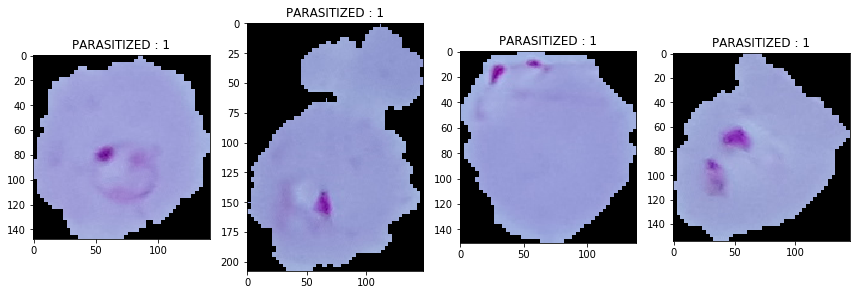

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/sam/Desktop/Project2021/Malariadetection/Cellimages/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

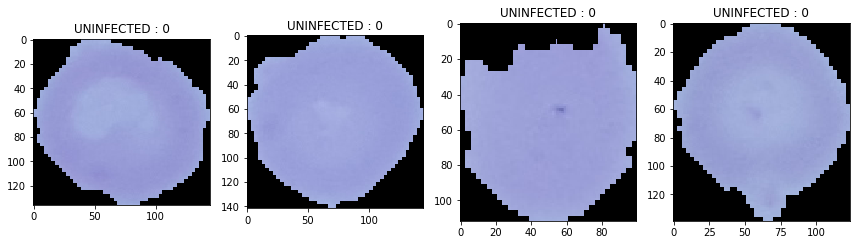

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/sam/Desktop/Project2021/Malariadetection/Cellimages/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [ ]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('C:/Users/sam/Desktop/Project2021/Malariadetection/Cellimages/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('C:/Users/sam/Desktop/Project2021/Malariadetection/Cellimages/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None



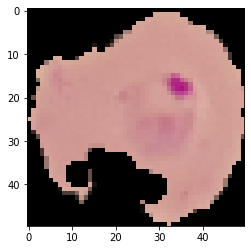

In [ ]:
plt.imshow(data[11])
plt.show()

In [ ]:
image_data = np.array(data)
labels = np.array(labels)


In [ ]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]
print(labels)

[1 1 0 ... 1 1 0]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [ ]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (6414, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (1604, 50, 50, 3)
SHAPE OF TRAINING LABELS : (6414, 2)
SHAPE OF TESTING LABELS : (1604, 2)


In [ ]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [ ]:
import tensorflow as tf

tf.__version__


'1.13.1'

In [ ]:
INPUT_SHAPE = (50, 50, 3)
BATCH_SIZE = 64
NUM_CLASSES = 2
EPOCHS = 25

In [ ]:
vgg = tf.keras.applications.MobileNet(include_top=False, weights='imagenet', 
                                        input_shape=INPUT_SHAPE)
vgg.trainable = False
# Freeze the layers
for layer in vgg.layers:
    layer.trainable = False
    
base_vgg = vgg
base_out = base_vgg.output
pool_out = tf.keras.layers.Flatten()(base_out)
hidden1 = tf.keras.layers.Dense(512, activation='relu')(pool_out)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out = tf.keras.layers.Dense(2, activation='softmax')(drop2)

model = tf.keras.Model(inputs=base_vgg.input, outputs=out)
model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

C:\Users\sam\Anaconda3\envs\tensorflow_env\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 51, 51, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseC

In [ ]:
print("Total Layers:", len(model.layers))
print("Total trainable layers:", sum([1 for l in model.layers if l.trainable]))


Total Layers: 93
Total trainable layers: 6


In [ ]:
import datetime

logdir = os.path.join('/home/dipanzan_sarkar/projects/tensorboard_logs', 
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS)


Instructions for updating:
Use tf.cast instead.
Epoch 1/25
6414/6414 [==============================] - 56s 9ms/sample - loss: 0.4973 - acc: 0.7987
Epoch 2/25
6414/6414 [==============================] - 55s 8ms/sample - loss: 0.3283 - acc: 0.8609
Epoch 3/25
6414/6414 [==============================] - 54s 8ms/sample - loss: 0.2915 - acc: 0.8812
Epoch 4/25
6414/6414 [==============================] - 54s 8ms/sample - loss: 0.2683 - acc: 0.8803
Epoch 5/25
6414/6414 [==============================] - 55s 9ms/sample - loss: 0.2412 - acc: 0.8991
Epoch 6/25
6414/6414 [==============================] - 55s 9ms/sample - loss: 0.2135 - acc: 0.9127
Epoch 7/25
6414/6414 [==============================] - 54s 8ms/sample - loss: 0.1970 - acc: 0.9171
Epoch 8/25
6414/6414 [==============================] - 54s 8ms/sample - loss: 0.1817 - acc: 0.9278
Epoch 9/25
6414/6414 [==============================] - 55s 9ms/sample - loss: 0.1753 - acc: 0.9286
Epoch 10/25
6414/6414 [=============================

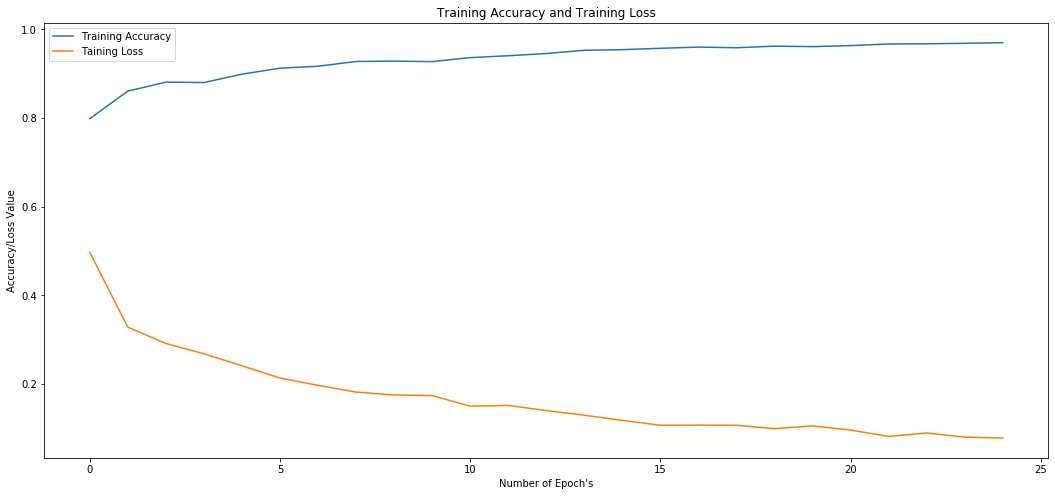

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(range(25), history.history['acc'], label = 'Training Accuracy')
plt.plot(range(25), history.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [ ]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

1604/1604 [==============================] - 6s 4ms/sample - loss: 1.1310 - acc: 0.5006


In [ ]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 1.130988574310431
ACCURACY : 0.5006234645843506
